# Stroke Prediction
This dataset is taken from [here](https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset/data)



#Import dataset and check all of the features

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [38]:
df = pd.read_csv("C:/Users/Lenovo/Documents/ITB/Seleksi-GAIB/dataset/healthcare-dataset-stroke-data.csv")
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


# Exploratory Data Analysis (EDA)

### Check statistics info for numerical features

In [40]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


### Check numerical features and their outliers

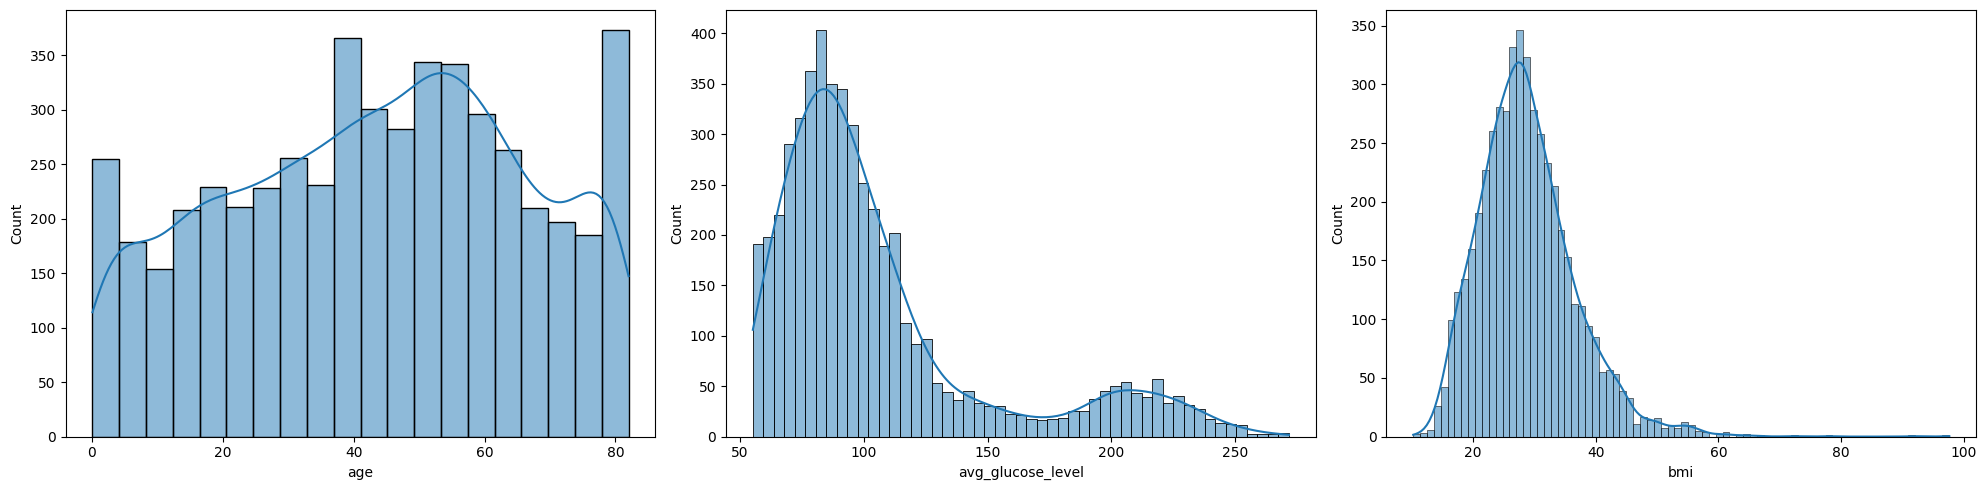

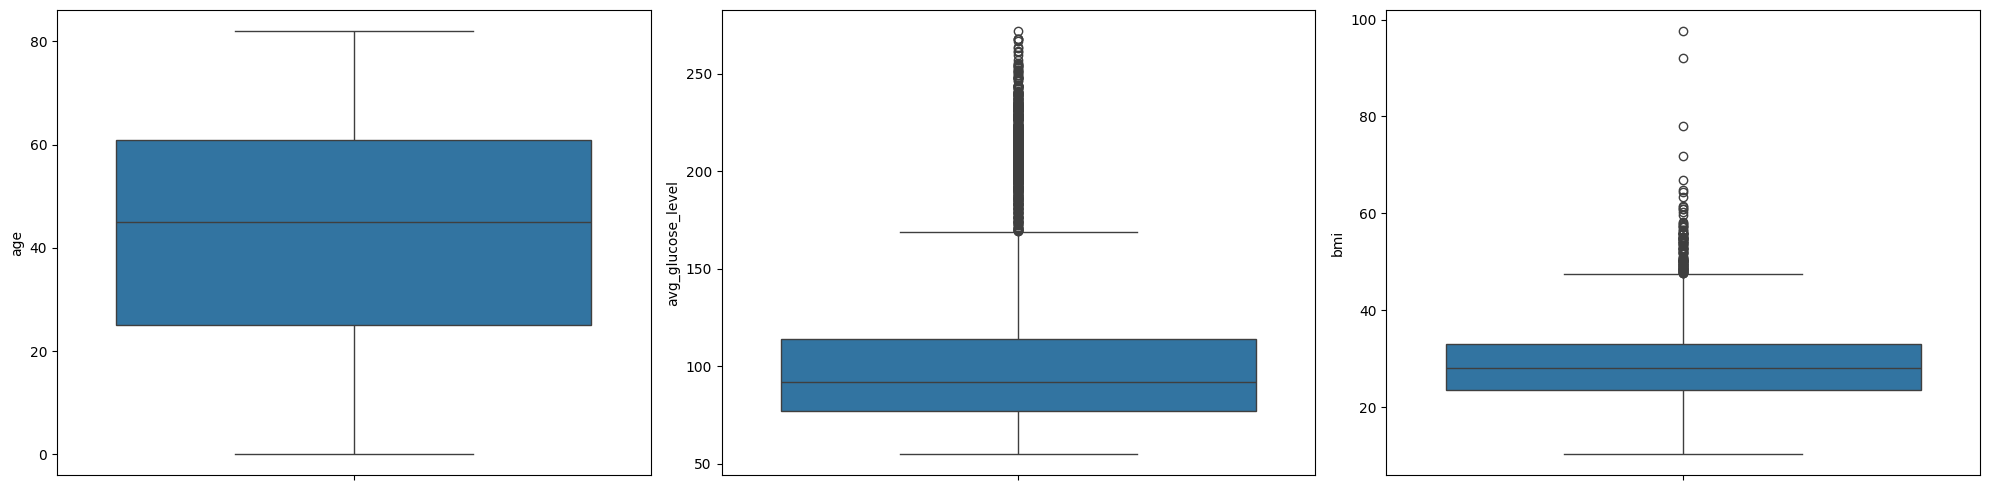

In [41]:
# List of continuous variables
num_df = ['age', 'avg_glucose_level', 'bmi']

# Plot the histograms for continuous variables
fig, ax = plt.subplots(1, 3, figsize=(20, 5))

for feature, subplot in zip(num_df, ax.flatten()):
    sns.histplot(df[feature], kde=True, ax=subplot)

plt.tight_layout()
plt.show()

# Plot the boxplots for continuous variables
fig, ax = plt.subplots(1, 3, figsize=(20, 5))

for feature, subplot in zip(num_df, ax.flatten()):
    sns.boxplot(df[feature], ax=subplot)

plt.tight_layout()
plt.show()

### Insight:
**age** feature has no outliers

**avg_glucose_level** has lots of outliers and the distribution is right-skewed

**bmi** has some extreme outliers which need to be handled

### Check the label (stroke)

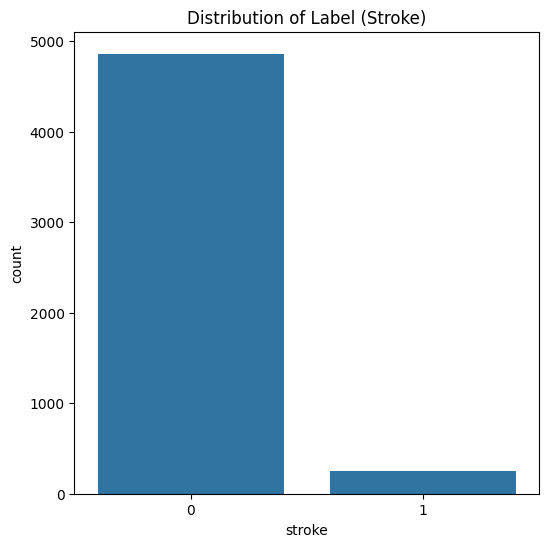

In [42]:
# Plot the label
plt.figure(figsize=(6, 6))
sns.countplot(x=df['stroke'])
plt.title('Distribution of Label (Stroke)')
plt.show()

### Insight:
The label is imbalanced with more instances of no stroke (0) than stroke (1).

### Check statistics info for categorical features

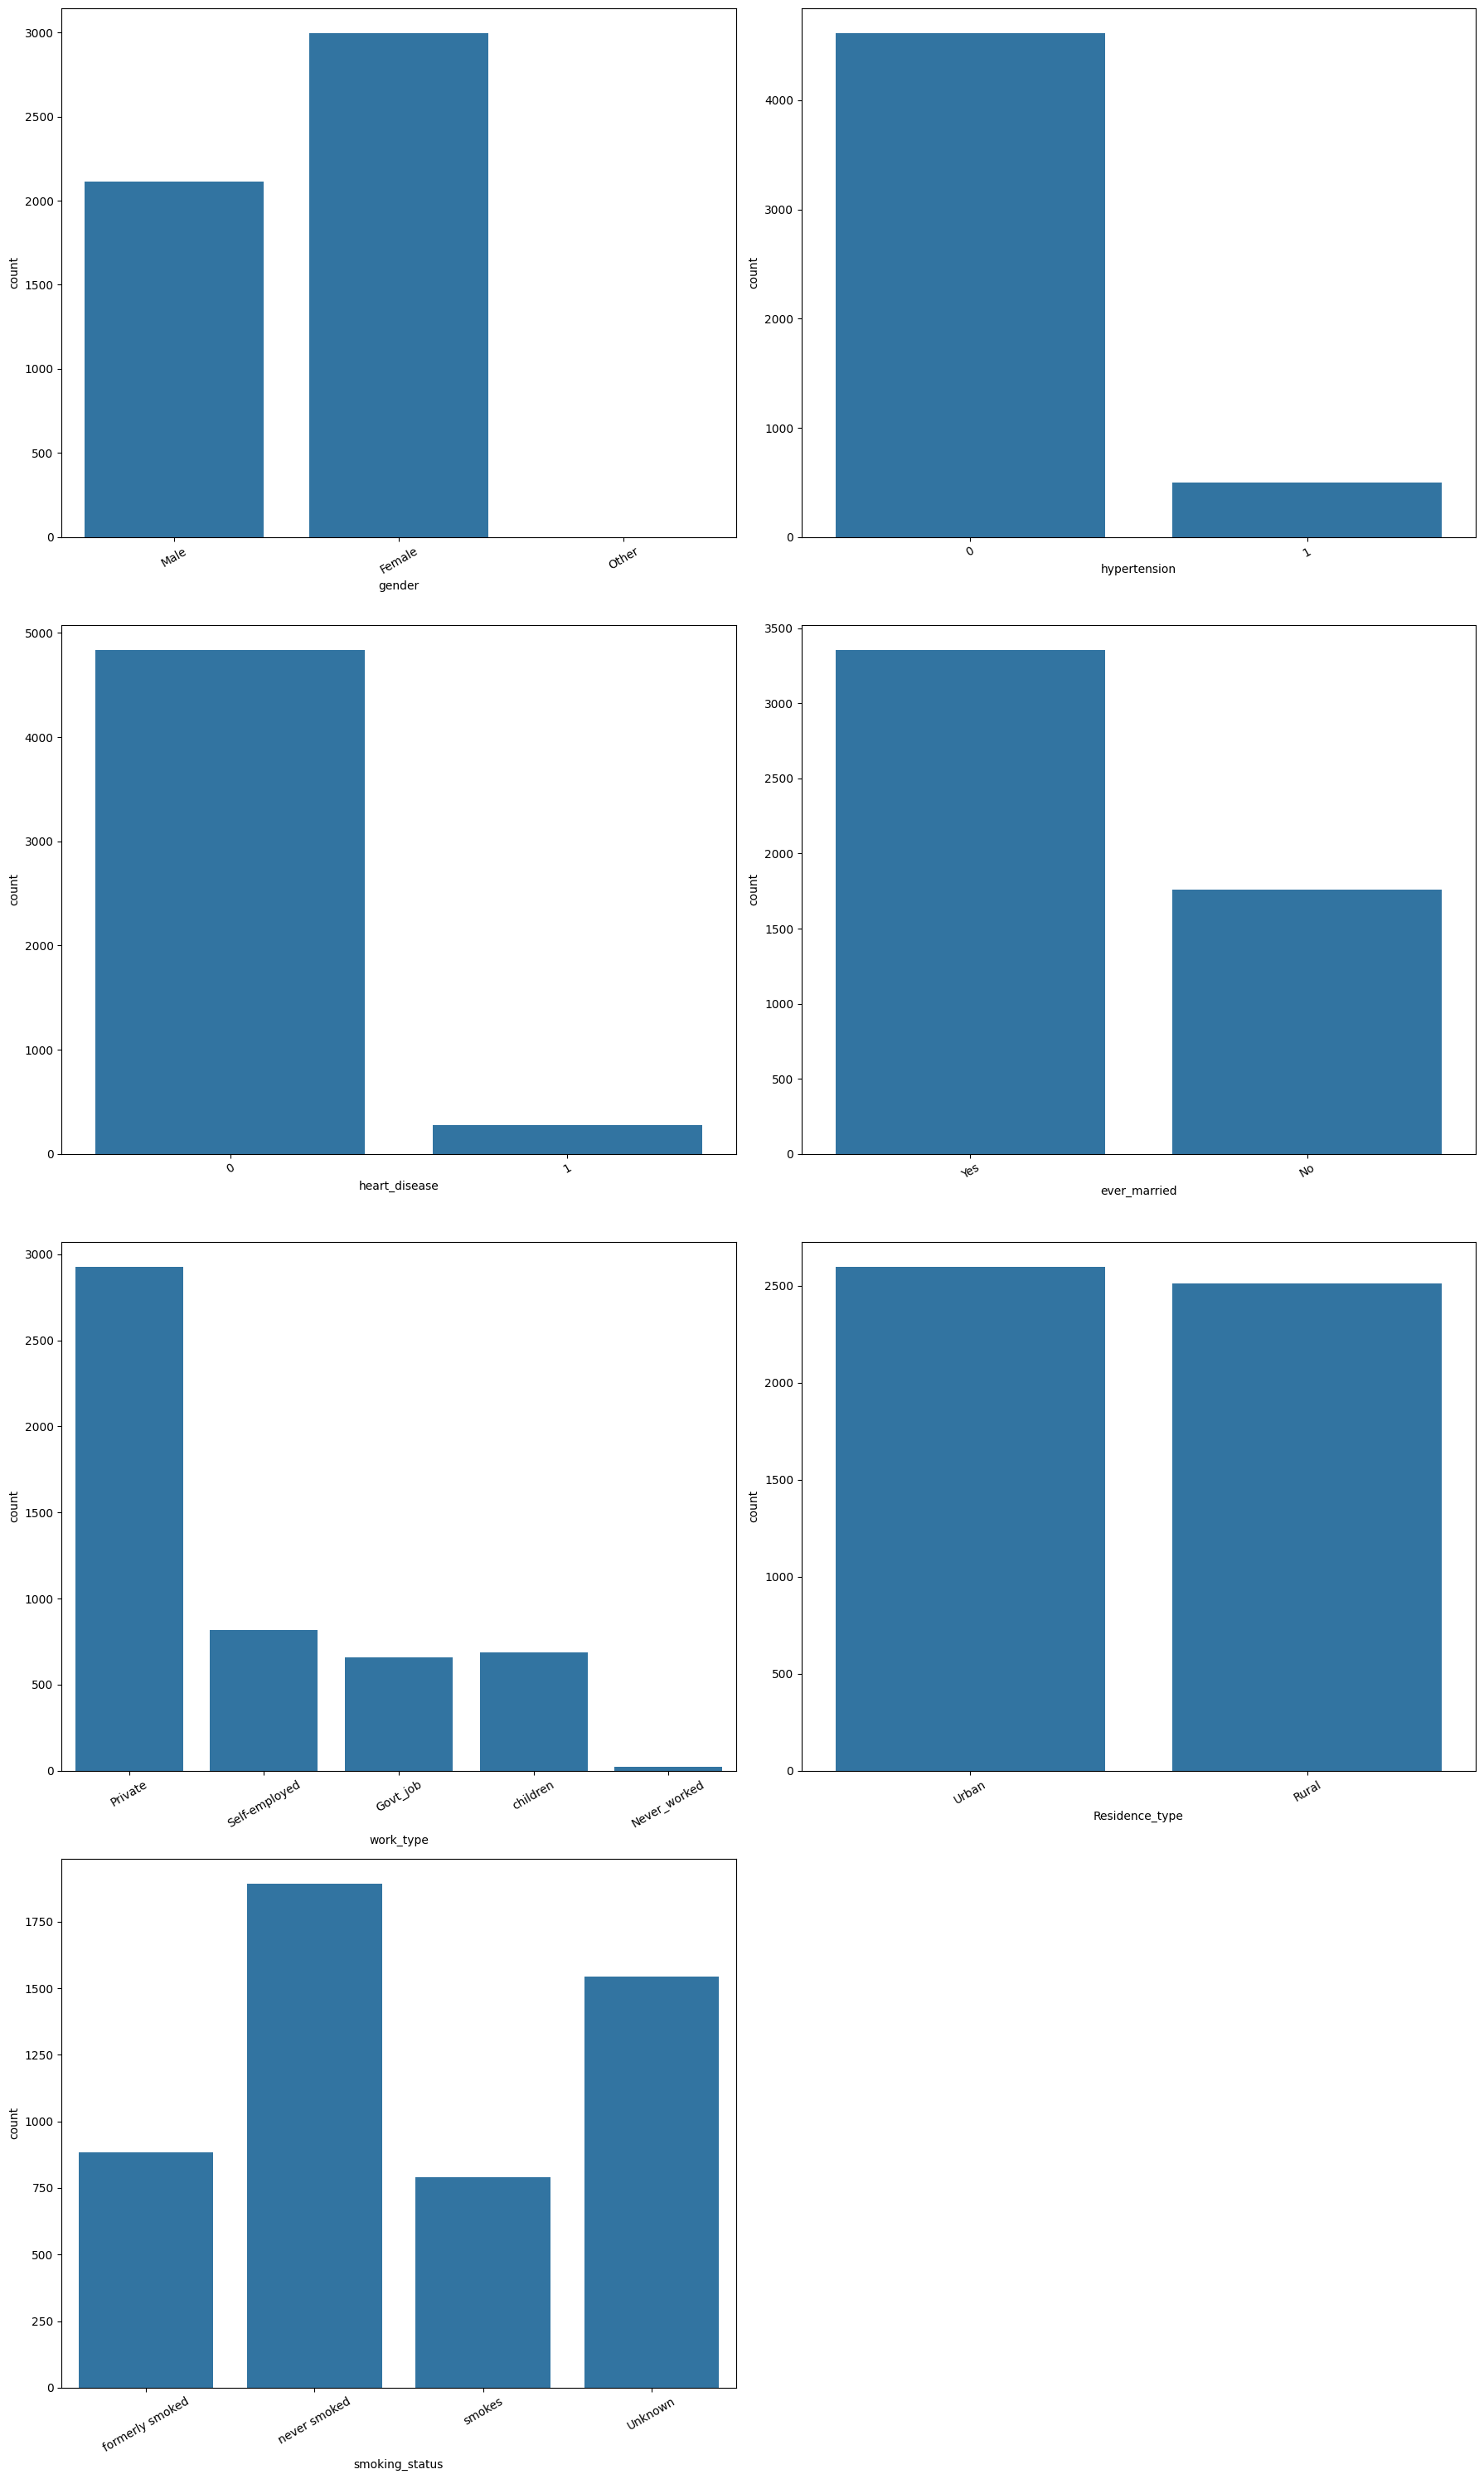

In [43]:
# List of categorical variables
cat_df = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

# Plot graph
fig, ax= plt.subplots(nrows= 4, ncols= 2, figsize= (18,30))
for feature, subplot in zip(cat_df, ax.flatten()):
    sns.countplot(x= feature, data= df, ax= subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(30)

# Delete all empty subplot (if any)
# len(cat_df) = filled subplot, len(ax.flatten()) = total available subplot
for idx in range(len(cat_df), len(ax.flatten())):
    fig.delaxes(ax.flatten()[idx])

plt.tight_layout()
plt.show()

### Insight:
**gender**: female is slightly greater than male.

**hypertension**: only few patients have hypertension.

**heart_disease**: only few patients have heart disease.

**ever_married**: most of the patients have married.

**work_type**: most of the patients work in private category, while the others are in self-employed, children, goverment, and never work category.

**Residence_type**: the number of patients who live in urban is almost the same as rural

**smoking_status**: most patients have never smoked, while the others remain unknown, formerly smoked, and smokes.


### Check the numerical features against the label

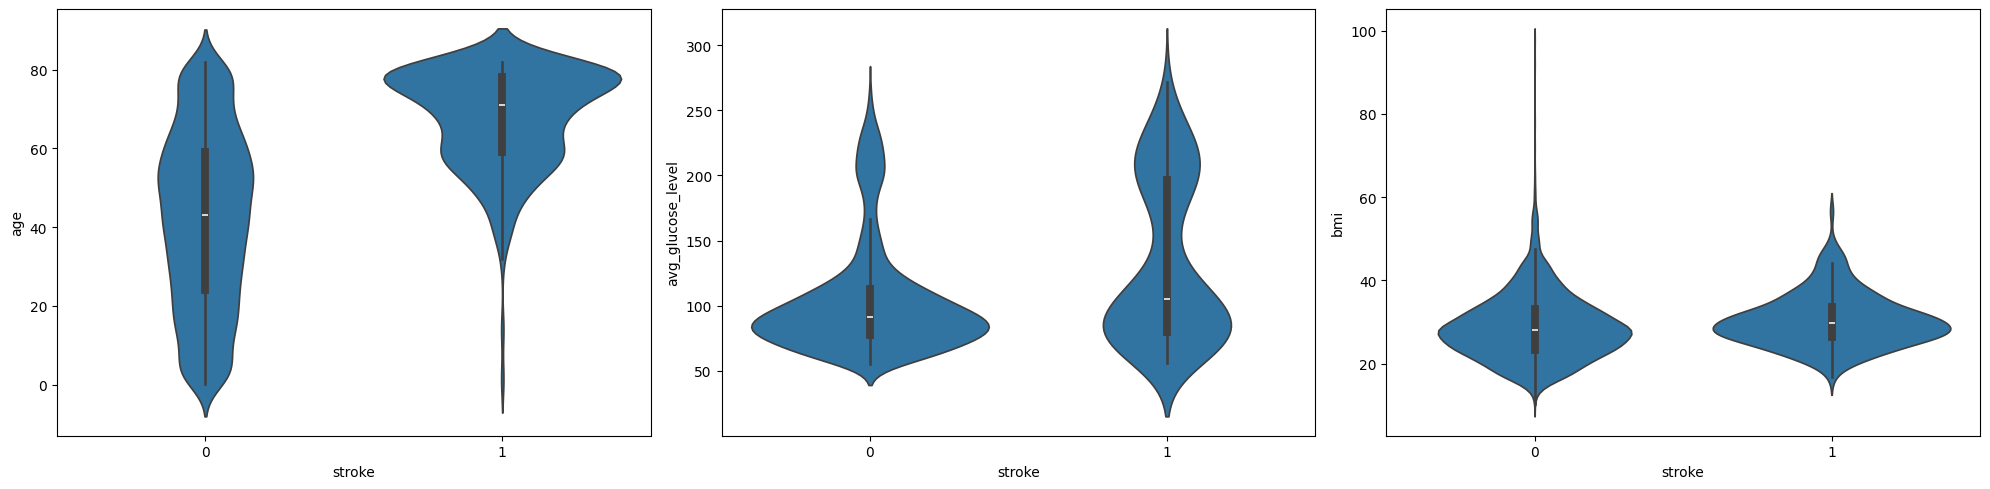

In [44]:
# Plot the continuous variables against the target variable 'stroke'
fig, axs = plt.subplots(1, 3, figsize=(20, 5))

for var, subplot in zip(num_df, axs.flatten()):
    sns.violinplot(x=df['stroke'], y=df[var], ax=subplot)

plt.tight_layout()
plt.show()

### Insight:
**age**: stroke is likely to happen on older patients

**avg_glucose_level**: stroke patients tend to have higher average glucose level than non-stroke patients.

**bmi**: the BMI distributions for stroke and non-stroke patients are quite similar, which could mean that BMI might not be a strong predictor for stroke.

### Check the categorical features against the label

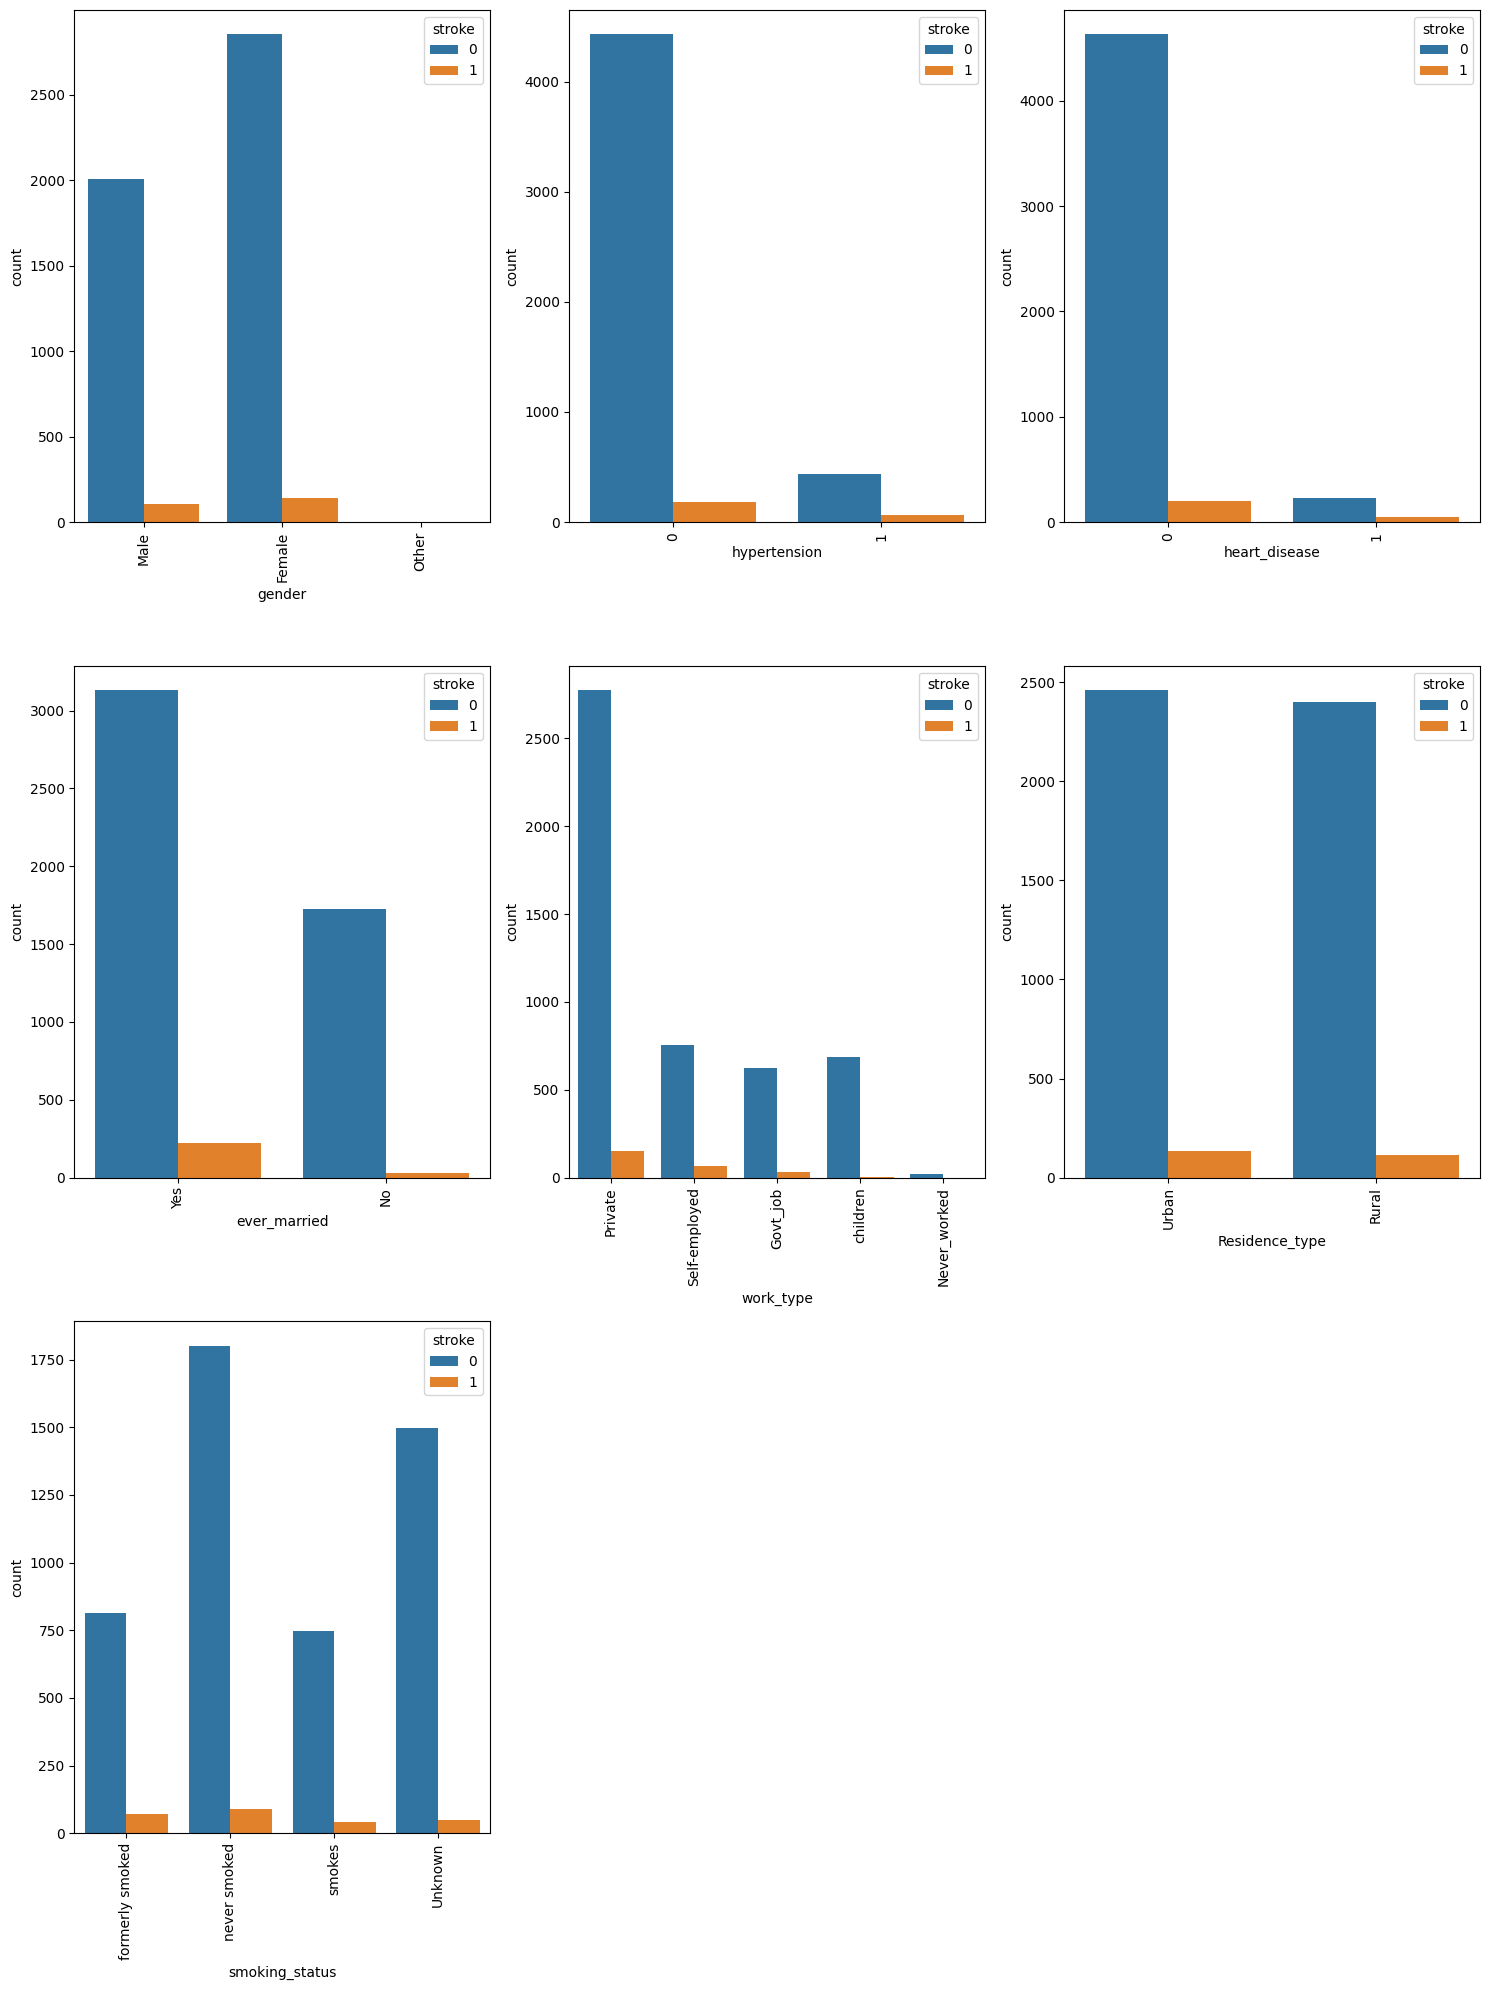

In [45]:
fig, ax = plt.subplots(3, 3, figsize=(15, 20))

for feature, subplot in zip(cat_df, ax.flatten()):
    sns.countplot(x=df[feature], hue=df['stroke'], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

for idx in range(len(cat_df), len(ax.flatten())):
    fig.delaxes(ax.flatten()[idx])

plt.tight_layout()
plt.show()

### Insight:
**gender**: both male and female have simillar case of getting stroke.

**hypertension**: patients with hypertension have higher proportion of getting stroke.

**heart_disease**:patients with heart disease have higher proportion of getting stroke.

**ever_married**:patients who have married have higher proportion of getting stroke.

**work_type**: patients who work in private jobs tend to have higher proportion in getting cancer.

**Residence_type**: both urban and rural have simillar case of getting stroke.

**smoking_status**: patients who formerly smoked and smokes have higher proportion of getting stroke than the others.


# Data Preprocessing

### Check missing values

In [46]:
# Remove id column
df = df.drop('id',axis=1)

df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

### Insight:
BMI has lot of missing values. Since bmi is important, it's better to impute the missing data instead of deleting it.

There are two ways to impute the missing data:
1. Using SimpleImputer with strategy= mean, or
2. Using KNNeighbour.

In [47]:
# Simple Imputer
# from sklearn.impute import SimpleImputer

# imputer = SimpleImputer(strategy='mean')
# imputed_data= imputer.fit_transform(df)

In [48]:
# KNNeighbour
from sklearn.neighbors import KNeighborsRegressor


def knn_imputer(df, target_feat):
  df= df.copy()

  numeric_df= df.select_dtypes(include=[np.number])
  non_empty_feature= numeric_df.loc[:, numeric_df.isna().sum() == 0].columns

  X_train= numeric_df.loc[numeric_df[target_feat].isna() == False, non_empty_feature]
  y_train= numeric_df.loc[numeric_df[target_feat].isna() == False, target_feat]
  X_test= numeric_df.loc[numeric_df[target_feat].isna() == True, non_empty_feature]

  knn = KNeighborsRegressor()
  knn.fit(X_train, y_train)

  y_pred = knn.predict(X_test)

  df.loc[df[target_feat].isna() == True, target_feat] = y_pred

  return df

target_feat = [col for col in df.columns if df[col].isnull().sum()!=0]

for col in target_feat:
    df = knn_imputer(df, col)

Mengapa menggunakan KNeighborsRegressor dibandingkan simple imputer?
Karena dengan menggunakan KNN, sample yang memiliki nilai NaN akan diisi dengan nilai baru berdasarkan kedekatan sample tersebut dengan sample lainnya dengan meninjau fitur2 lain yang dimiliki oleh sample terdekatnya sehingga nilai baru yang dihasilkan bisa lebih akurat.


### Check for duplicate values

In [49]:
dup = df.duplicated().any()
dup

False

### Handle Outliers

In [50]:
def find_outliers(feature):
  Q1 = feature.quantile(0.25)
  Q3 = feature.quantile(0.75)
  IQR = Q3 - Q1

  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  return ((feature < lower_bound) | (feature > upper_bound)).sum()

outliers = {feature: find_outliers(df[feature]) for feature in ['age', 'avg_glucose_level', 'bmi']}
outliers

{'age': 0, 'avg_glucose_level': 627, 'bmi': 117}

In [51]:
# Apply log transformation
df['avg_glucose_level']= np.log(df['avg_glucose_level'])
df['bmi']= np.log(df['bmi'])

print({find_outliers(df[column]) for column in ['avg_glucose_level', 'bmi']})

{380, 68}


Kenapa menormalisasikan fitur yang memiliki outliers sebagai penanganan untuk outliers?
Karena banyak sample yang memiliki outliers (lebih dari 500) sehingga menghapus outliers bukanlah langkah yang tepat. Selain itu, mengubah nilai outliers ke batas atas/bawah berdasarkan boxplotnya juga tidak begitu bagus karena mungkin outliers tersebut memang berguna bagi model nantinya dalam mempelajari training data. Oleh karena itu, normalisasi fitur denga mengubahnya menjadi log(fitur) adalah langkah yang tepat.

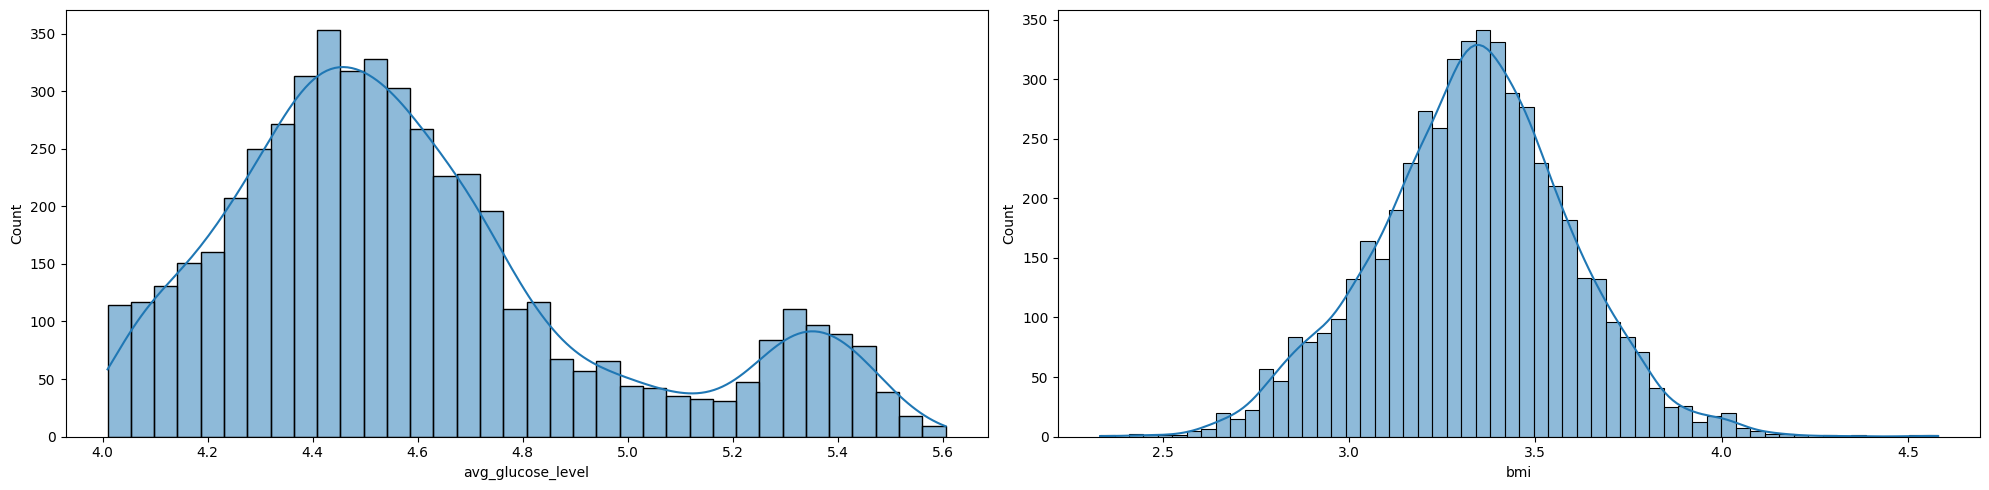

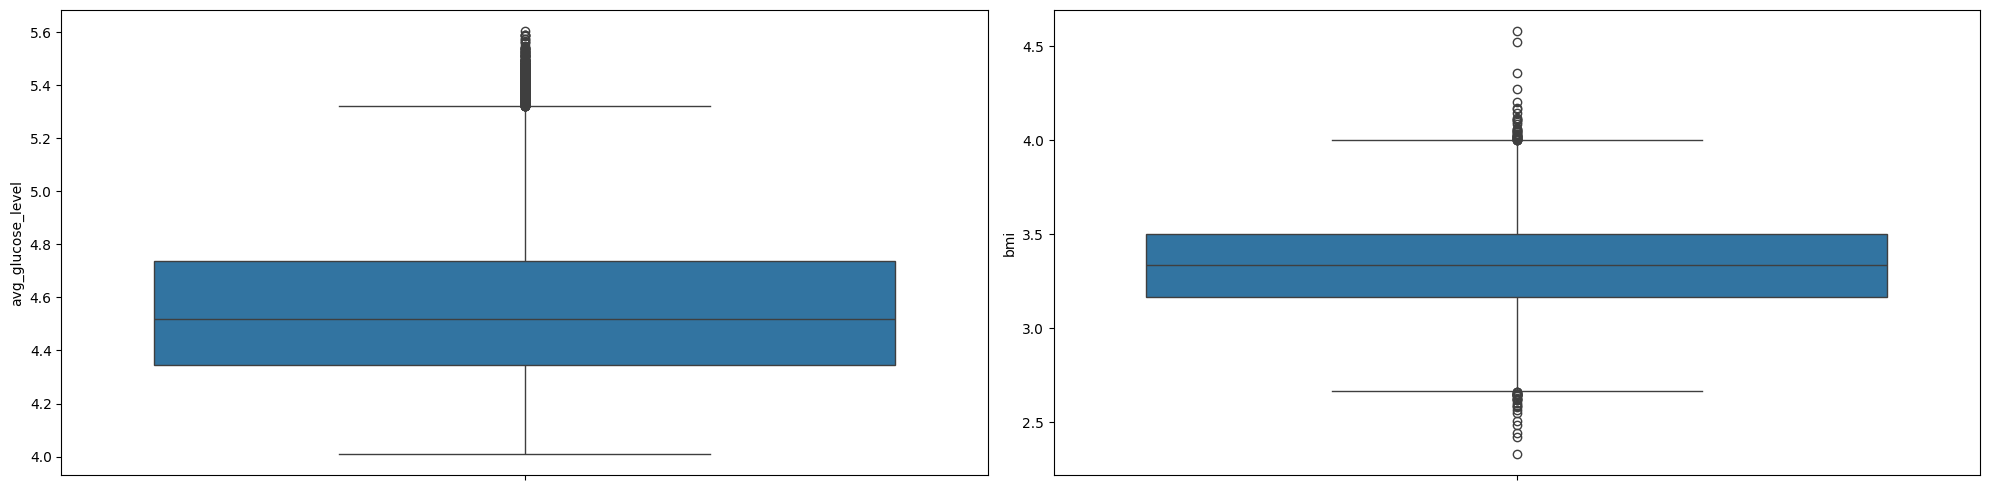

In [52]:
# Plot the hist and boxplot
num_df_with_outliers= ['avg_glucose_level', 'bmi']

fig, ax= plt.subplots(1, 2, figsize=(20,5))

for feat, subplot in zip (num_df_with_outliers, ax.flatten()):
  sns.histplot(df[feat], kde=True, ax= subplot)

plt.tight_layout()
plt.show()

fig, ax= plt.subplots(1, 2, figsize=(20,5))

for feat, subplot in zip (num_df_with_outliers, ax.flatten()):
  sns.boxplot(df[feat], ax= subplot)

plt.tight_layout()
plt.show()

Walaupun kedua fitur ini masih memiliki outliers, tetapi hal ini bisa dibiarkan saja karena persebarannya yang tidak terlalu jauh dan plot histogram juga menunjukkan kalau persebaran data sudah menddekati distribusi normal.

### Encoding Categorical Data

In [53]:
from sklearn.preprocessing import LabelEncoder

# Drop the row with Other for gender
df = df[df['gender'] != 'Other']

# Convert categorical variables to numerical format using one hot encoding
df= pd.get_dummies(df, columns= cat_df)
for feat in df.columns:
  if df[feat].dtype == 'bool':
    df[feat]= df[feat].astype('int')
  elif df[feat].dtype == 'float64':
    df[feat]= df[feat].astype('int64')

Kenapa menggunakan one hot encoder?
Karena pada dataset ini, tidak ada kategori data yang memiliki urutan hierarki atau tingkatan tertentu (seperti tinggi, sedang, rendah) sehingga lebih baik menggunakan one hot encoder dibandingkan encoder lainnya seperti label encoding. 

In [54]:
df.head()

,age,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,hypertension_0,hypertension_1,heart_disease_0,heart_disease_1,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67,5,3,1,0,1,1,0,0,1,...,0,1,0,0,0,1,0,1,0,0
1,61,5,3,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,1,0
2,80,4,3,1,0,1,1,0,0,1,...,0,1,0,0,1,0,0,0,1,0
3,49,5,3,1,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1
4,79,5,3,1,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,1,0


In [55]:
# Split the data into X and y
X= df.drop('stroke', axis=1)
y= df['stroke']

# Convert to numpy array so it will be easier to be processed
X= X.to_numpy()
y= y.to_numpy()
X, y

(array([[67,  5,  3, ...,  1,  0,  0],
        [61,  5,  3, ...,  0,  1,  0],
        [80,  4,  3, ...,  0,  1,  0],
        ...,
        [35,  4,  3, ...,  0,  1,  0],
        [51,  5,  3, ...,  1,  0,  0],
        [44,  4,  3, ...,  0,  0,  0]], dtype=int64),
 array([1, 1, 1, ..., 0, 0, 0], dtype=int64))

In [56]:
X_train,X_test,y_train,y_test= train_test_split(X, y, shuffle=True, test_size=0.1, random_state=42)

In [58]:
from sklearn.ensemble import RandomForestClassifier

rf= RandomForestClassifier(n_estimators=100,random_state=42)
rf.fit(X_train, y_train)
rf.score(X_test,y_test)

0.9158512720156555

In [59]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.9393346379647749

In [63]:
from supervised_learning.knn import KNNeighbours
# from sklearn.model_selection import cross_val_score

knn_scratch = KNNeighbours(k=5, metrics='euclidean')
knn_scratch.fit(X_train, y_train)
y_pred = knn_scratch.predict(X_test)
accuracy_score(y_test, y_pred)

0.9452054794520548

In [64]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=2000, random_state=1)
logreg.fit(X_train, y_train)
logreg.score(X_test, y_test)

0.9452054794520548

In [65]:
from supervised_learning.logistic_regression import LogisticRegression

lr_scratch= LogisticRegression(learning_rate=0.01, iterations=2000, reg_term='l1')
lr_scratch.fit(X_train, y_train)
y_pred= lr_scratch.predict(X_test)
accuracy_score(y_test, y_pred)

0.9452054794520548

In [66]:
from sklearn.naive_bayes import GaussianNB
gaussian = GaussianNB()

gaussian.fit(X_train, y_train)
gaussian.score(X_test, y_test)

0.4735812133072407

In [69]:
from supervised_learning.gaussian_naive_bayes import GaussianNaiveBayes

gnb_scratch= GaussianNaiveBayes()
gnb_scratch.fit(X_train, y_train)
y_pred= gnb_scratch.predict(X_test)
accuracy_score(y_test, y_pred)

0.3639921722113503

In [70]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
cross_val_score(dt, X_test, y_test, cv=5, scoring='accuracy').mean()

0.9040738625547305

In [74]:
from supervised_learning.decision_tree import DecisionTree

dt_scratch= DecisionTree(max_depth=5)
# Convert y_train to 2D array to avoid error when concatenating
y_train= y_train.reshape(-1,1)
dt_scratch.fit(X_train, y_train)
y_pred= dt_scratch.predict(X_test)
accuracy_score(y_test, y_pred)

0.9452054794520548

In [80]:
# Convert y_train back to 1D array
y_train= y_train.ravel() 

In [81]:
from sklearn import svm

clf = svm.SVC()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9452054794520548

In [82]:
from supervised_learning.svm import SVM

svm_scratch = SVM(learning_rate=0.01, iterations=1000)
svm_scratch.fit(X_train, y_train)
y_pred = svm_scratch.predict(X_test)
accuracy_score(y_test, y_pred)

0.9452054794520548

In [ ]:
import tensorflow as tf

tf.random.set_seed(42)
model1= tf.keras.Sequential([
    tf.keras.Input(shape=(22,)),  # 10 features as input
    tf.keras.layers.Dense(32, activation='linear'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='softmax'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model1.compile(loss= tf.keras.losses.BinaryCrossentropy(),
               optimizer= tf.keras.optimizers.Adam(),
               metrics= ['accuracy'])

model1.fit(X_train, y_train, epochs=10)

model1.evaluate(X_test, y_test)


Epoch 1/10
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 959us/step - accuracy: 0.8235 - loss: 0.5634
Epoch 2/10
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 823us/step - accuracy: 0.9484 - loss: 0.4323
Epoch 3/10
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9484 - loss: 0.3712
Epoch 4/10
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9484 - loss: 0.3268
Epoch 5/10
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9484 - loss: 0.2945
Epoch 6/10
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9484 - loss: 0.2707
Epoch 7/10
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9484 - loss: 0.2531
Epoch 8/10
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9484 - loss: 0.2401
Epoch 9/10
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9484 - loss: 0.2304
Epoch 10/10
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9484 - loss: 0.2231
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 989us/step - accuracy: 0.9435 - loss: 0.2297


[0.22590120136737823, 0.9452054500579834]